KNN 

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [36]:
dataset = pd.read_csv('dataset.csv',  header=None)

In [37]:
dataset.head()

,0,1,2
0,1.8036,4.4229,3
1,3.4615,4.1436,2
2,2.1873,3.9964,1
3,3.0933,2.9056,1
4,1.7586,2.4109,1


In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       280 non-null    float64
 1   1       280 non-null    float64
 2   2       280 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 6.7 KB


In [39]:
# Διαχωρισμός δεδομένων 50%-50%
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [40]:

def train_and_evaluate_knn(k, X_train, y_train, X_test, y_test):
    # Knn
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test)

    # Calculate the error
    error = 1 - accuracy_score(y_test, y_pred)
    return knn, error


<IPython.core.display.Javascript object>


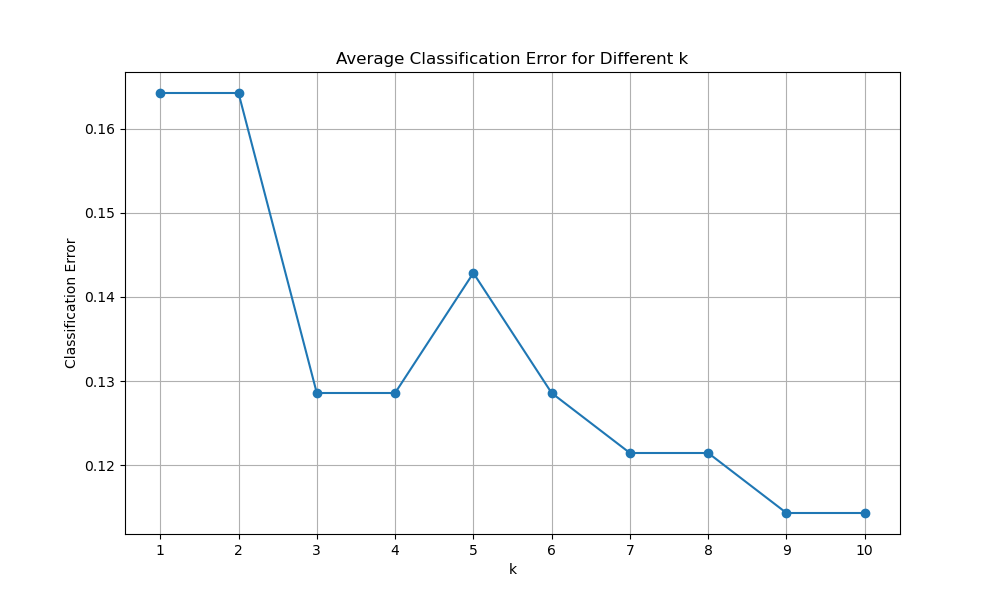

In [41]:
errors = []
for k in range(1, 11):
    _, error = train_and_evaluate_knn(k, X_train, y_train, X_test, y_test)
    errors.append(error)

# Plotting the errors for different values of k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), errors, marker='o')
plt.title('Average Classification Error for Different k')
plt.xlabel('k')
plt.ylabel('Classification Error')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [42]:
def plot_decision_boundaries_knn(X_train, y_train, X_test, y_test, k, ax):
    # Train the model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Create a mesh grid for plotting
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict class for each point in the mesh
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundaries
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=20, edgecolor='k')
    ax.set_title(f"k = {k}")


<IPython.core.display.Javascript object>


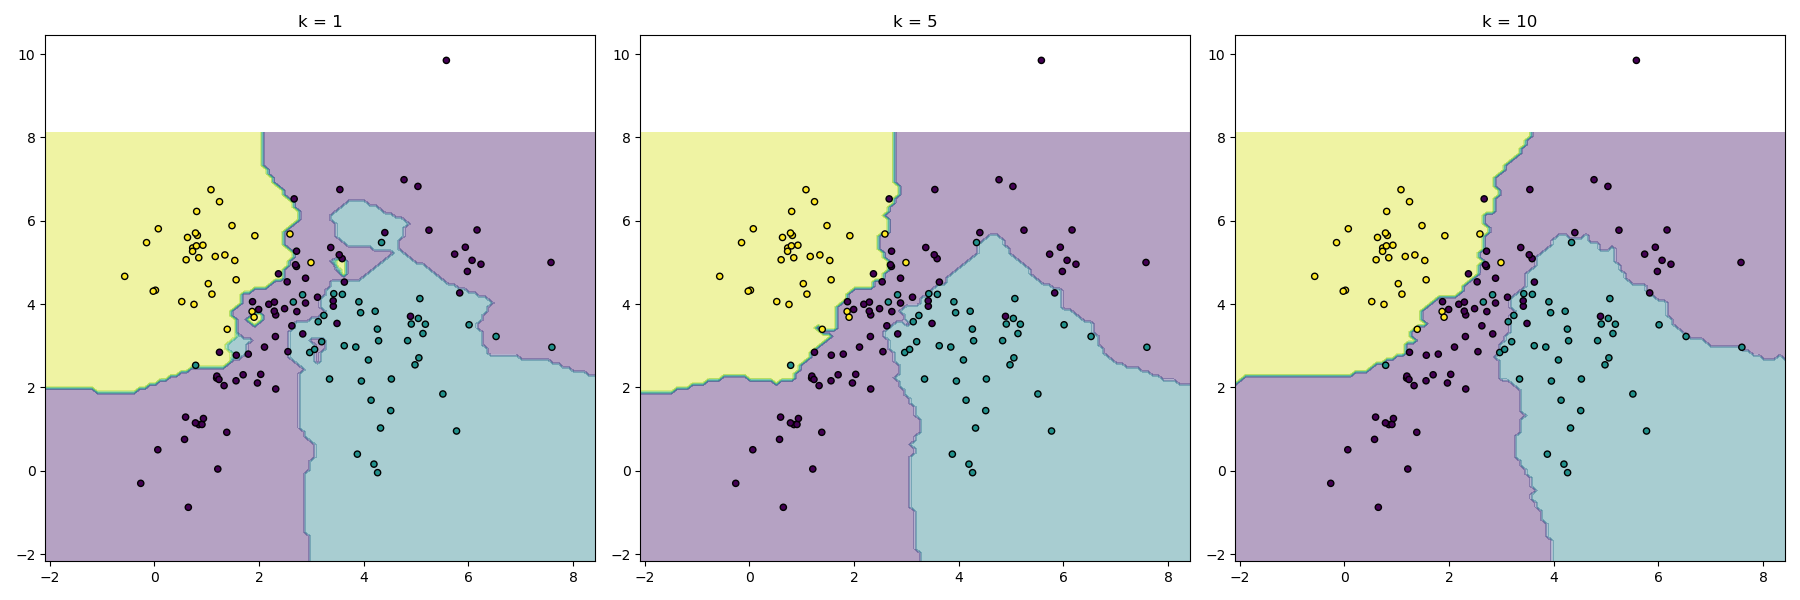

In [43]:

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot decision boundaries for k = 1, 5, 10
for i, k in enumerate([1, 5, 10]):
    plot_decision_boundaries_knn(X_train, y_train, X_test, y_test, k, axs[i])

plt.tight_layout()
plt.show()
